In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Конфигурация

In [159]:
tube = {
    "inner_diameter": 2e-2,
}

bullets = [
    {
        "name": "light",
        "mass": 4.30e-3,
        "color": "tab:red",
        "velocity": {
            "average": [],
            "sigma": []
        }
    },
    {
        "name": "meduim",
        "mass": 5.72e-3,
        "color": "tab:orange",
        "velocity": {
            "average": [],
            "sigma": []
        }
    },
    {
        "name": "heavy",
        "mass": 8.57e-3,
        "color": "tab:blue",
        "velocity": {
            "average": [],
            "sigma": []
        }
    }
]

data = pd.read_csv('data.csv')

lengths = np.array(data.columns, dtype=int) / 100


for bullet_ind in range(3):
    velocity = []
    for i in range(3):
        velocity.append(np.array(data.values[bullet_ind * 3 + i], dtype=np.float64))
    
    av_velocity = sum(velocity) / 3
    bullets[bullet_ind]['velocity']['average'] = av_velocity

### Настройки графика

In [103]:
fig_size = (5, 3)
dpi = 250
out_path = lambda x: fr'..\article\img\{x}.png'

### График зависимости скорости от длины

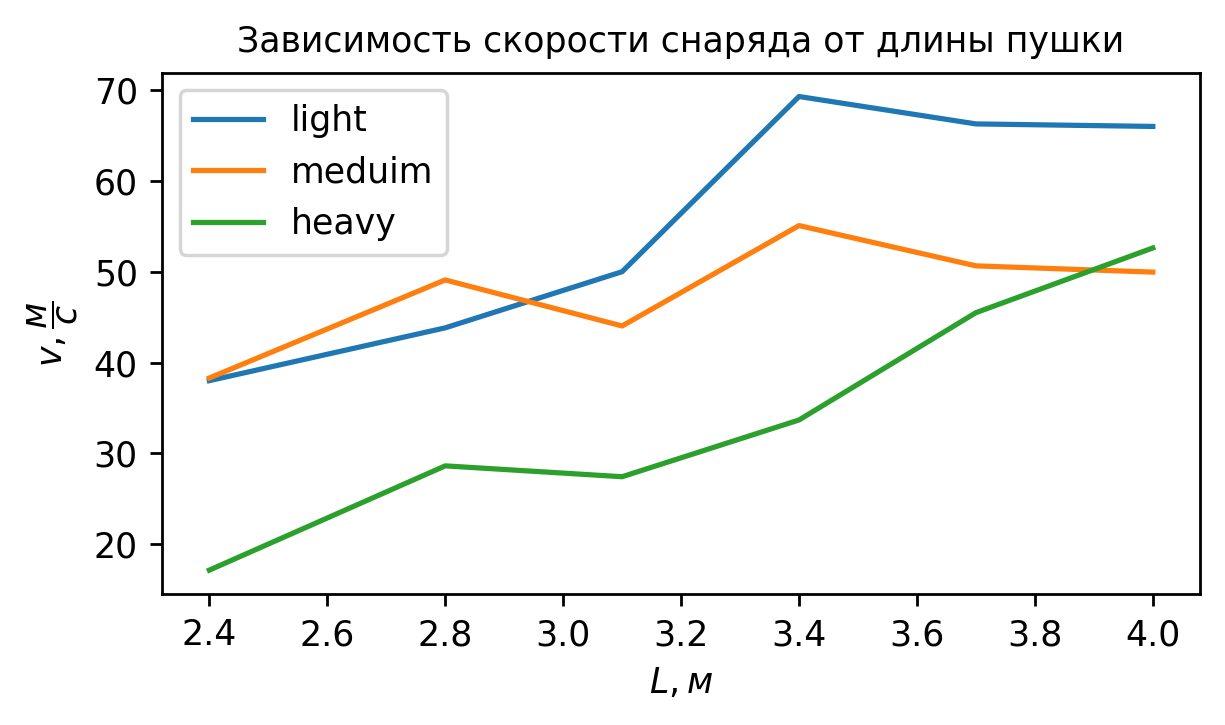

In [140]:
plt.figure(figsize=fig_size, dpi=dpi)

for bullet in bullets:
    name = bullet['name']
    av_velocity = bullet['velocity']['average']
    plt.plot(lengths, av_velocity, label=name)

plt.xlabel('$L, м$')
plt.ylabel('$v, \dfrac{м}{с}$')
plt.title('Зависимость скорости снаряда от длины пушки', size='medium')
plt.legend()
plt.tight_layout()
plt.savefig(out_path('V-on-L'))

### График зависимости импульса от длины

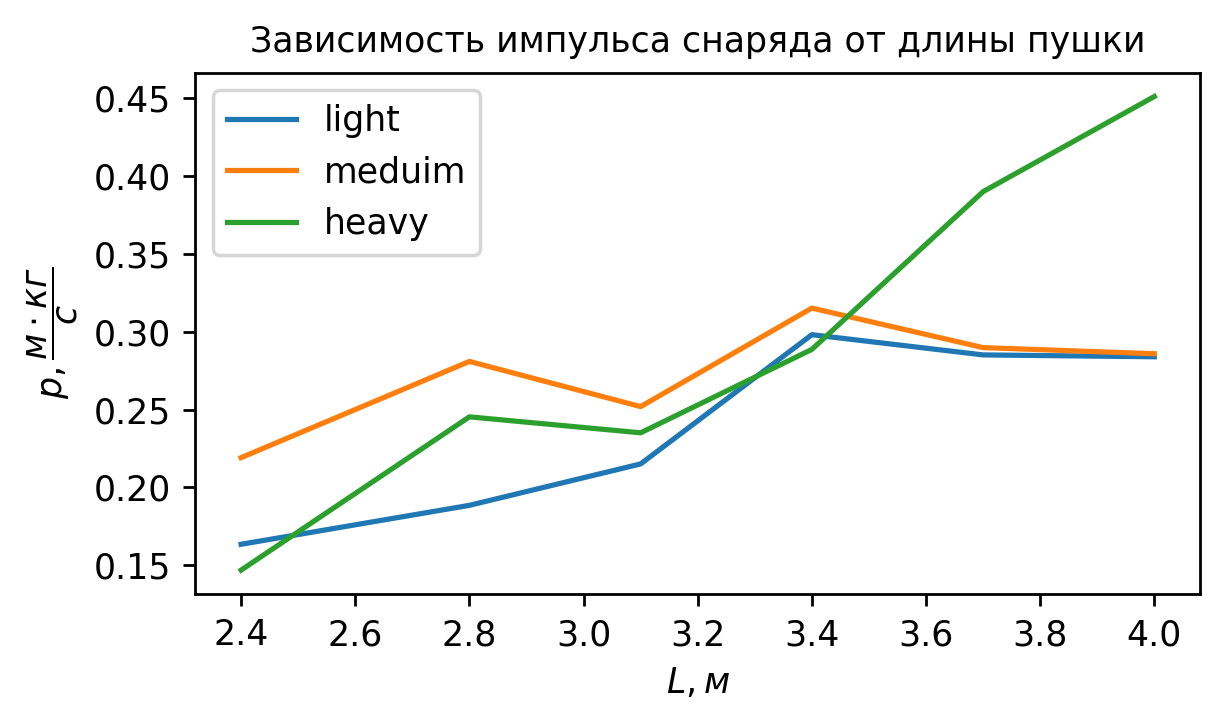

In [141]:
plt.figure(figsize=fig_size, dpi=dpi)

for bullet in bullets:
    name = bullet['name']
    m = bullet['mass']
    av_velocity = bullet['velocity']['average']
    plt.plot(lengths, av_velocity * m, label=name)

plt.xlabel('$L, м$')
plt.ylabel('$p, \dfrac{м \cdot кг}{с}$')
plt.title('Зависимость импульса снаряда от длины пушки', size='medium')
plt.legend()
plt.tight_layout()
plt.savefig(out_path('P-on-L'))

### График зависимости энергии от длины

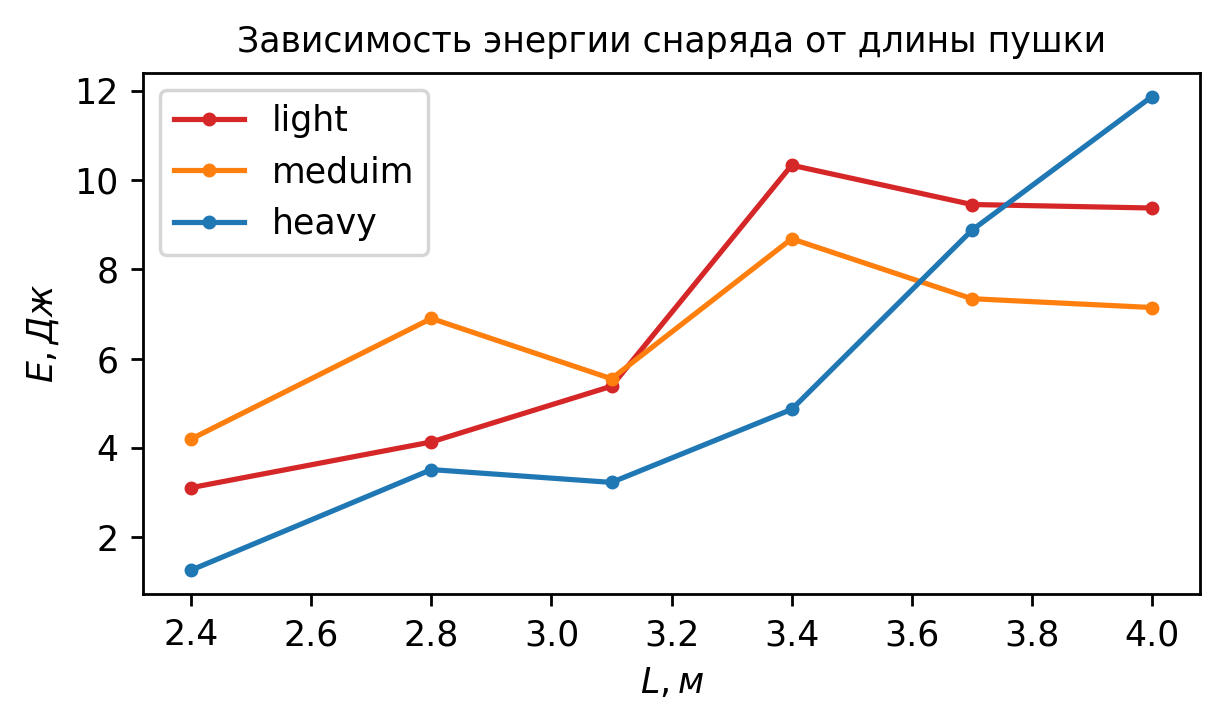

In [160]:
plt.figure(figsize=fig_size, dpi=dpi)

for bullet in bullets:
    name = bullet['name']
    m = bullet['mass']
    color = bullet['color']
    av_velocity = bullet['velocity']['average']
    plt.plot(lengths, (av_velocity ** 2) * m / 2, label=name, color=color, marker='.')

plt.xlabel('$L, м$')
plt.ylabel('$E, Дж$')
plt.title('Зависимость энергии снаряда от длины пушки', size='medium')
plt.legend()
plt.tight_layout()
plt.savefig(out_path('E-on-L'))